In [34]:
# Loading Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [35]:
# Loading Data From Source.
def load_data():
  url = r'https://raw.githubusercontent.com/Python-Charmer/Final-Project-Team-Python-Charmer/master/Phase1/Data/BreastCancerWisconsin.csv'
  df = pd.read_csv(url)
  names = ['Scn','A2','A3','A4','A5','A6','A7', 'A8','A9','A10','Class']
  df.columns = names
  return df

In [36]:
# Understanding Missing Values
def clean_missing(df):
  df['A7'] = df['A7'].replace('?',np.NaN)
  df['A7'] = pd.to_numeric(df['A7'])
  # print("Below are how many missing values for each column\n")
  # print(df.isnull().sum())
  # print("\nCleaning missing values with column means\n")
  df = df.fillna(df.mean(skipna = True))
  # print(df.isnull().sum())
  return df

In [37]:
# Plotting graphs
def plot_graphs(df):
  print("\nBelow are the histograms of A2:A10 \n")
  df.iloc[:,1:10].hist(bins = 8, color="blue", grid="False",alpha = .5, figsize=(12,6))
  plt.tight_layout(rect=(0,0,1.2,1.2))
  plt.show()
  df['Class'].value_counts().plot.bar().set_title("Class Variable: 2 = Benign 4 = Malignant")
  df.plot.scatter(x='A3', y='A4').set_title("Scatter of A3 & A4 90% corr")

In [38]:
# Main Function
df = load_data()
df = clean_missing(df)
#sum_metrics(df)
#plot_graphs(df)

In [39]:
#Implementing K-Means and show Centoids
#KMeans algorithm using 4 clusters and calculating centroids
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cancer = KMeans(n_clusters = 4)
cancer.fit(df.iloc[:,1:-1])
centroids = cancer.cluster_centers_
pd.DataFrame(centroids, columns = df.iloc[:,1:-1].columns)

,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,2.956140,1.252193,1.377193,1.311404,2.052632,1.349859,2.070175,1.210526,1.083333
1,6.679487,8.346154,8.384615,7.782051,6.692308,9.333333,7.358974,7.820513,3.769231
2,7.661538,7.507692,7.092308,4.338462,5.923077,3.532830,5.584615,7.061538,2.461538
3,7.210000,4.810000,4.990000,4.750000,4.050000,9.045447,5.220000,3.830000,1.630000


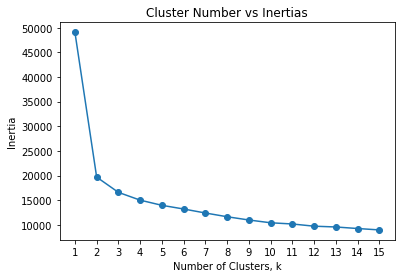

In [40]:
# Calculate Intertia
ks = range(1,16)
inertias = []
for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(df.iloc[:,1:-1])
  inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o')
plt.title('Cluster Number vs Inertias')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()


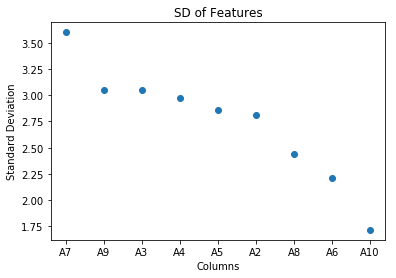

In [41]:
# Calculating Standard deviations of all features to inspect variation
SD = df.iloc[:,1:-1].std()
plt.plot(SD.sort_values(ascending = False),'o')
plt.title("SD of Features")
plt.xlabel("Columns")
plt.ylabel("Standard Deviation")
plt.xticks(df.iloc[:,1:-1].columns)
plt.show()

In [42]:
# Implementing Normalization using StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=2, n_init=20)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(df.iloc[:,1:-1])                    

pd.DataFrame(pipeline.named_steps['kmeans'].cluster_centers_, columns = df.iloc[:,1:10].columns)

,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,-0.496223,-0.60690,-0.602092,-0.514917,-0.509713,-0.580600,-0.547702,-0.530778,-0.303758
1,0.986083,1.20602,1.196465,1.023233,1.012892,1.153757,1.088383,1.054751,0.603622


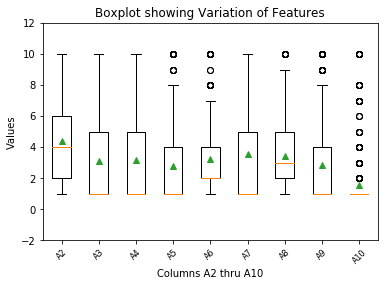

In [48]:
# Box plot showing variation of the columns A2:A10
data = []
for i in range(1, 10):
    data.append(df.iloc[:, i])

# Multiple box plots on one Axes
fig, ax = plt.subplots()
plt.title("Boxplot showing Variation of Features")
plt.xlabel("Columns A2 thru A10")
plt.ylabel("Values")
ax.boxplot(data, 0,showbox=True,showmeans=True)
top = 12
bottom = -2
ax.set_ylim(bottom, top)
ax.set_xticklabels(df.iloc[:,1:-1].columns, rotation=45, fontsize=8)

plt.show()

In [44]:
# Cross tabulating the cluster labels with "Class"
labels = cancer.fit_predict(df.iloc[:,1:-1])
ctf = pd.DataFrame({'labels': labels, 'Class': df["Class"]})
pd.crosstab(ctf['labels'], ctf['Class'])

Class,2,4
labels,,
0,444,10
1,7,87
2,0,80
3,7,64


In [45]:
# Implementing Normalization using StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=2, n_init=20)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(df.iloc[:,1:-1])

pd.DataFrame(pipeline.named_steps['kmeans'].cluster_centers_, columns = df.iloc[:,1:10].columns)

,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,-0.497738,-0.608113,-0.603239,-0.516173,-0.513524,-0.585717,-0.548496,-0.530603,-0.303672
1,0.982768,1.200701,1.191076,1.019167,1.013936,1.156480,1.082987,1.047659,0.599590


In [46]:
# Cross tabulating the labels against "Class" after stardardization
labels = pipeline.predict(df.iloc[:,1:-1])
ctf_s = pd.DataFrame({'labels': labels, 'Class': df["Class"]})
pd.crosstab(ctf_s['labels'], ctf_s['Class'])

Class,2,4
labels,,
0,446,18
1,12,223
